<a href="https://colab.research.google.com/github/andrezma/GridSafe-AI/blob/main/test01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd
!ls

/content
sample_data


In [ ]:
#url: https://cds.climate.copernicus.eu/api
#key: 14501e17-5532-47e7-adc1-91dd13a1a885

!echo "url: https://cds.climate.copernicus.eu/api" > $HOME/.cdsapirc
!echo "key: 14501e17-5532-47e7-adc1-91dd13a1a885" >> $HOME/.cdsapirc

In [ ]:
!pip install "cdsapi>=0.7.4"

In [ ]:
import cdsapi

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": [
        "2m_temperature",
        "total_precipitation"
    ],
    "year": ["2019"],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "zip",
    "area": [55.1391, -3.7994, 52.6083, -1.4412]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2025-05-20 13:27:16,520 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-20 13:27:16,523 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-20 13:27:17,578 INFO Request ID is 5fa2e5b4-6d7b-459e-9c66-7de6e3329ff7
INFO:ecmwf.datastores.legacy_client:Request ID is 5fa2e5b4-6d7b-459e-9c66-7de6e3329ff7
2025-05-20 13:27:17,837 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-05-20 13:27:51,859 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_cl

3107a0141c78dbe62d21c1e881c9ec93.zip:   0%|          | 0.00/4.67M [00:00<?, ?B/s]

'3107a0141c78dbe62d21c1e881c9ec93.zip'

In [ ]:
# @title Texto de título predeterminado
# prompt: extraer archivos de 748d9a373573f31217c3c98977e704bb.zip

import zipfile

def extract_zip(zip_filepath, extract_dir):
  """Extracts a zip file to a specified directory.

  Args:
    zip_filepath: The path to the zip file.
    extract_dir: The directory to extract the files to.
  """
  try:
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)
    print(f"Successfully extracted '{zip_filepath}' to '{extract_dir}'")
  except FileNotFoundError:
    print(f"Error: Zip file not found at '{zip_filepath}'")
  except zipfile.BadZipFile:
    print(f"Error: Invalid zip file at '{zip_filepath}'")
  except Exception as e:
    print(f"An unexpected error occurred: {e}")


# Example usage (replace with your actual paths)
zip_file_path = "748d9a373573f31217c3c98977e704bb.zip"
extract_directory = "/content/sample_data"  # or any other desired directory

extract_zip(zip_file_path, extract_directory)


Successfully extracted '748d9a373573f31217c3c98977e704bb.zip' to '/content/sample_data'


In [ ]:
!pwd
!ls -al sample_data/
!ls -al /content/

/content
total 55512
drwxr-xr-x 1 root root     4096 May 14 13:38 .
drwxr-xr-x 1 root root     4096 May 20 13:49 ..
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 May 14 13:38 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 May 14 13:38 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 May 14 13:38 mnist_test.csv
-rw-r--r-- 1 root root 36523880 May 14 13:38 mnist_train_small.csv
-rwxr-xr-x 1 root root      962 Jan  1  2000 README.md
total 4800
drwxr-xr-x 1 root root    4096 May 20 13:49 .
drwxr-xr-x 1 root root    4096 May 20 13:13 ..
-rw-r--r-- 1 root root 4894981 May 20 13:49 3107a0141c78dbe62d21c1e881c9ec93.zip
drwxr-xr-x 4 root root    4096 May 14 13:38 .config
drwxr-xr-x 1 root root    4096 May 14 13:38 sample_data


In [ ]:
# prompt: quiero analizar la informacion del archivo data_stream-oper_stepType-accum.nc en primer lugar cuales son las variables que contiene (encabezado)

import xarray as xr

# Assuming the NetCDF file is named 'data_stream-oper_stepType-accum.nc' and is in the current directory or provide the correct path
try:
  ds = xr.open_dataset('sample_data/data_stream-oper_stepType-accum.nc')
  print(ds)  # This will print the dataset's variables, dimensions, and attributes
except FileNotFoundError:
  print("Error: 'data_stream-oper_stepType-accum.nc' not found in the specified directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


<xarray.Dataset> Size: 427kB
Dimensions:     (valid_time: 920, latitude: 11, longitude: 10)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 7kB 2024-07-01 ... 2024-12-31T19:...
  * latitude    (latitude) float64 88B 55.11 54.86 54.61 ... 53.11 52.86 52.61
  * longitude   (longitude) float64 80B -3.8 -3.55 -3.3 ... -2.049 -1.799 -1.549
    expver      (valid_time) <U4 15kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 405kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-06T04:45 GRIB to CDM+CF via cfgrib-0.9.1...


In [ ]:
# prompt: quiero analizar la informacion del archivo data_stream-oper_stepType-accum.nc en primer lugar cuales son las variables que contiene (encabezado)

import xarray as xr

# Assuming the NetCDF file is named 'data_stream-oper_stepType-accum.nc' and is in the current directory or provide the correct path
try:
  ds = xr.open_dataset('sample_data/data_stream-oper_stepType-instant.nc')
  print(ds)  # This will print the dataset's variables, dimensions, and attributes
except FileNotFoundError:
  print("Error: 'data_stream-oper_stepType-accum.nc' not found in the specified directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


<xarray.Dataset> Size: 3MB
Dimensions:     (valid_time: 920, latitude: 11, longitude: 10)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 7kB 2024-07-01 ... 2024-12-31T19:...
  * latitude    (latitude) float64 88B 55.11 54.86 54.61 ... 53.11 52.86 52.61
  * longitude   (longitude) float64 80B -3.8 -3.55 -3.3 ... -2.049 -1.799 -1.549
    expver      (valid_time) <U4 15kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 405kB ...
    v10         (valid_time, latitude, longitude) float32 405kB ...
    d2m         (valid_time, latitude, longitude) float32 405kB ...
    t2m         (valid_time, latitude, longitude) float32 405kB ...
    msl         (valid_time, latitude, longitude) float32 405kB ...
    sst         (valid_time, latitude, longitude) float32 405kB ...
    sp          (valid_time, latitude, longitude) float32 405kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre fo

In [ ]:
# prompt: quiero analizar la informacion del archivo data_stream-oper_stepType-accum.nc en primer lugar cuales son las variables que contiene (encabezado)

import xarray as xr

# Assuming the NetCDF file is named 'data_stream-oper_stepType-accum.nc' and is in the current directory or provide the correct path
try:
  ds = xr.open_dataset('sample_data/data_stream-wave_stepType-instant.nc')
  print(ds)  # This will print the dataset's variables, dimensions, and attributes
except FileNotFoundError:
  print("Error: 'data_stream-oper_stepType-accum.nc' not found in the specified directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


<xarray.Dataset> Size: 353kB
Dimensions:     (valid_time: 920, latitude: 6, longitude: 5)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 7kB 2024-07-01 ... 2024-12-31T19:...
  * latitude    (latitude) float64 48B 55.11 54.61 54.11 53.61 53.11 52.61
  * longitude   (longitude) float64 40B -3.8 -3.3 -2.8 -2.299 -1.799
    expver      (valid_time) <U4 15kB ...
Data variables:
    mwd         (valid_time, latitude, longitude) float32 110kB ...
    mwp         (valid_time, latitude, longitude) float32 110kB ...
    swh         (valid_time, latitude, longitude) float32 110kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-06T04:45 GRIB to CDM+CF via cfgrib-0.9.1...


<xarray.DataArray 't2m' (valid_time: 920, latitude: 11, longitude: 10)> Size: 405kB
[101200 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 7kB 2024-07-01 ... 2024-12-31T19:...
  * latitude    (latitude) float64 88B 55.11 54.86 54.61 ... 53.11 52.86 52.61
  * longitude   (longitude) float64 80B -3.8 -3.55 -3.3 ... -2.049 -1.799 -1.549
    expver      (valid_time) <U4 15kB ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      110
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:         

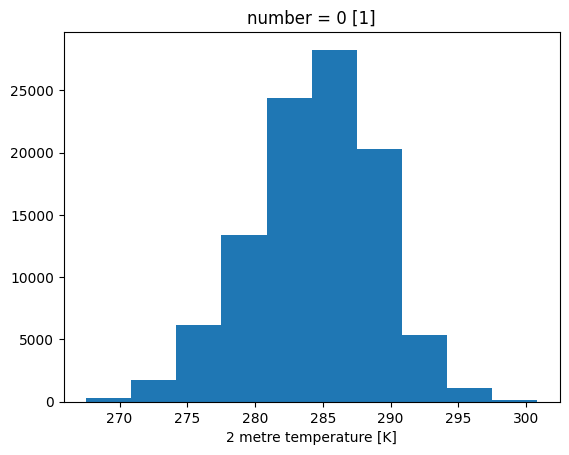

In [ ]:
# prompt: del archivo data_stream-oper_stepType-instant.nc quiero visualizar la variable t2m

import xarray as xr

# Assuming the NetCDF file is named 'data_stream-oper_stepType-instant.nc' and is in the 'sample_data' directory.
# Adjust the file path if necessary.
try:
    ds = xr.open_dataset('sample_data/data_stream-oper_stepType-instant.nc')

    # Access the 't2m' variable
    t2m_data = ds['t2m']

    # Now you can work with the 't2m_data' xarray DataArray
    print(t2m_data)  # Print the data

    # Example: Calculate the mean temperature
    mean_t2m = t2m_data.mean()
    print(f"Mean t2m: {mean_t2m}")

    # Example: Plot the data
    import matplotlib.pyplot as plt
    t2m_data.plot()
    plt.show()

except FileNotFoundError:
    print("Error: 'data_stream-oper_stepType-instant.nc' not found in the specified directory.")
except KeyError:
  print("Error: 't2m' variable not found in the dataset.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
